In [179]:
!pip install --upgrade pip
!pip install pandas numpy scikit-learn scipy graphviz shap matplotlib

18972.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


18978.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [295]:
# Data Processing
import pandas as pd
import numpy as np

from shap import TreeExplainer
from shap import summary_plot
import shap.plots

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [181]:

# fraction = 0.25

# sampled_chunks = []
# chunk_size = 1000000

# for i, chunk in enumerate(pd.read_csv('traces/upb-hyccups2012/upb2012.csv', chunksize=chunk_size)):
#     if i > 3:
#         break
#     # Sample a fraction of rows from each chunk
#     sampled_chunk = chunk.sample(frac=fraction, random_state=1)
#     sampled_chunks.append(sampled_chunk)
# df = pd.concat(sampled_chunks, ignore_index=True)


df = pd.read_csv("traces/upb-hyccups2012/upb2012.csv", nrows=50000)

In [182]:
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222


In [183]:
successful_messages = pd.read_csv("traces/upb-hyccups2012/successful2012.csv", nrows=10000)

In [184]:
successful_messages

,messageId,lastRelay,destination
0,14,5,0
1,579,5,0
2,595,5,0
3,604,6,1
4,1176,6,1
...,...,...,...
9995,1797,4,0
9996,1798,4,0
9997,1291,4,0
9998,1864,4,0


In [185]:
df["usefulTransfer"] = np.NaN
df

,messageId,messageSource,messageHopCount,oldRelayId,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newRelayId,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
1,1,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
2,2,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
3,3,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
4,4,0,1,5,0,0.333218,0,0.045,0,0,0.730968,0,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1281,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49996,1282,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49997,1283,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN
49998,1284,5,2,0,0,0.730968,0,0.286,2,0,0.637417,0,0.222,NaN


In [186]:
# make sure column is integer not float
df["usefulTransfer"] = pd.Series(dtype=np.int64)

for index, row in successful_messages.iterrows():
  message_id = row.iloc[0]
  last_relay = row.iloc[1]
  destination = row.iloc[2]

  reached_source = False
  queue = df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist()
  visited = []
  while (True):
    if (len(queue) == 0):
       break

    curr_idx = queue.pop()
    visited.append(curr_idx)

    df_row = df.iloc[curr_idx]
    message_source = df_row.iloc[1]
    old_relay_id = df_row.iloc[3]

    if old_relay_id == message_source:
        break

    df.loc[curr_idx, "usefulTransfer"] = 1
    last_relay = old_relay_id


    for idx in df[(df['messageId'] == message_id) & (df['newRelayId'] == last_relay)].index.tolist():
       if (idx not in visited):
         queue.insert(0, idx)

df.loc[(df['usefulTransfer'] != 1), 'usefulTransfer'] = 0
df = df.drop(columns=['messageId', 'oldRelayId', 'newRelayId', 'messageSource'])
df['usefulTransfer'].value_counts()[1]


2663

In [187]:
df.to_csv('traces/upb-hyccups2012/with_result.csv', index=False)


In [188]:
positive_df = df.loc[df['usefulTransfer'] == 1]
negative_df = df.loc[df['usefulTransfer'] == 0].sample(len(positive_df))
balanced_df = pd.concat([positive_df, negative_df], ignore_index=True)
print(balanced_df.min())
print(balanced_df.max())
balanced_df

messageHopCount             0.000000
oldFriendWithDestination    0.000000
oldRelayBattery             0.128897
oldCommonCommunity          0.000000
oldDataMemory               0.045000
newFriendWithDestination    0.000000
newRelayBattery             0.128897
newCommonCommunity          0.000000
newDataMemory               0.000000
usefulTransfer              0.000000
dtype: float64
messageHopCount             6.000000
oldFriendWithDestination    1.000000
oldRelayBattery             0.964487
oldCommonCommunity          1.000000
oldDataMemory               0.808000
newFriendWithDestination    1.000000
newRelayBattery             0.984842
newCommonCommunity          1.000000
newDataMemory               0.813000
usefulTransfer              1.000000
dtype: float64


,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory,usefulTransfer
0,0,0,0.730968,1,0.047,1,0.637417,0,0.001,1.0
1,0,0,0.730968,1,0.047,1,0.637417,0,0.009,1.0
2,0,0,0.730968,1,0.047,1,0.637417,0,0.019,1.0
3,2,0,0.730968,0,0.047,0,0.637417,0,0.041,1.0
4,2,0,0.637417,0,0.108,0,0.730968,0,0.047,1.0
...,...,...,...,...,...,...,...,...,...,...
5321,3,0,0.385189,0,0.572,0,0.240536,0,0.582,0.0
5322,3,1,0.625146,0,0.799,1,0.879183,0,0.813,0.0
5323,2,0,0.333218,0,0.158,0,0.730968,0,0.140,0.0
5324,3,0,0.385189,0,0.572,0,0.240536,0,0.579,0.0


In [189]:
balanced_df['messageHopCount']

0       0
1       0
2       0
3       2
4       2
       ..
5321    3
5322    3
5323    2
5324    3
5325    1
Name: messageHopCount, Length: 5326, dtype: int64

In [296]:
# add preprocessing
min_max_scaler = MinMaxScaler((0,1))
preprocessed_df = balanced_df.copy()

result_df = pd.DataFrame(balanced_df['usefulTransfer'].copy())
one_hot_encoder = LabelEncoder()
encoded = one_hot_encoder.fit_transform(result_df)
result_df = pd.DataFrame(encoded, columns=['usefulTransfer'])

preprocessed_df = preprocessed_df.drop(columns=['usefulTransfer'])
columns = preprocessed_df.columns
indices = preprocessed_df.index
preprocessed_df['messageHopCount'] = min_max_scaler.fit_transform(preprocessed_df['messageHopCount'].values.reshape(-1,1))
standard_scaler = StandardScaler()
preprocessed_df = standard_scaler.fit_transform(preprocessed_df)
preprocessed_df = pd.DataFrame(preprocessed_df, indices, columns)
preprocessed_df


/home/sebastian/mobemu/.venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.927627
1,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.889721
2,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.842340
3,-0.300914,-0.672617,1.338471,-0.487587,-1.832239,-0.784167,1.090610,-0.31038,-1.738101
4,-0.300914,-0.672617,0.934010,-0.487587,-1.533327,-0.784167,1.529838,-0.31038,-1.709672
...,...,...,...,...,...,...,...,...,...
5321,0.248698,-0.672617,-0.156488,-0.487587,0.740365,-0.784167,-0.772785,-0.31038,0.825239
5322,0.248698,1.486731,0.880956,-0.487587,1.852710,1.275238,2.225720,-0.31038,1.919752
5323,-0.300914,-0.672617,-0.381182,-0.487587,-1.288317,-0.784167,1.529838,-0.31038,-1.269024
5324,0.248698,-0.672617,-0.156488,-0.487587,0.740365,-0.784167,-0.772785,-0.31038,0.811024


In [304]:
result_df

,usefulTransfer
0,1
1,1
2,1
3,1
4,1
...,...
5321,0
5322,0
5323,0
5324,0


In [305]:
preprocessed_df

,messageHopCount,oldFriendWithDestination,oldRelayBattery,oldCommonCommunity,oldDataMemory,newFriendWithDestination,newRelayBattery,newCommonCommunity,newDataMemory
0,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.927627
1,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.889721
2,-1.400138,-0.672617,1.338471,2.050916,-1.832239,1.275238,1.090610,-0.31038,-1.842340
3,-0.300914,-0.672617,1.338471,-0.487587,-1.832239,-0.784167,1.090610,-0.31038,-1.738101
4,-0.300914,-0.672617,0.934010,-0.487587,-1.533327,-0.784167,1.529838,-0.31038,-1.709672
...,...,...,...,...,...,...,...,...,...
5321,0.248698,-0.672617,-0.156488,-0.487587,0.740365,-0.784167,-0.772785,-0.31038,0.825239
5322,0.248698,1.486731,0.880956,-0.487587,1.852710,1.275238,2.225720,-0.31038,1.919752
5323,-0.300914,-0.672617,-0.381182,-0.487587,-1.288317,-0.784167,1.529838,-0.31038,-1.269024
5324,0.248698,-0.672617,-0.156488,-0.487587,0.740365,-0.784167,-0.772785,-0.31038,0.811024


In [312]:
X = preprocessed_df.copy() # All columns except the last one
y = result_df.copy().squeeze()
print(X.shape)
print(y.shape)

(5326, 9)
(5326,)


In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       520
           1       0.84      0.90      0.87       546

    accuracy                           0.86      1066
   macro avg       0.86      0.86      0.86      1066
weighted avg       0.86      0.86      0.86      1066

Confusion Matrix:
[[423  97]
 [ 54 492]]


In [316]:
explainer = TreeExplainer(rf_classifier, feature_names=features_data)
shap_values = np.array(explainer.shap_values(X_test))

In [317]:
truncated_shap = shap_values[:20][:][:]
truncated_x = X_test.head(20).to_numpy()

In [318]:
truncated_shap

array([[[-4.13706200e-01,  4.13706200e-01],
        [-7.99667239e-02,  7.99667239e-02],
        [ 2.91469767e-02, -2.91469767e-02],
        [ 1.98846976e-02, -1.98846976e-02],
        [ 2.06780543e-02, -2.06780543e-02],
        [-8.89435874e-02,  8.89435874e-02],
        [-2.33622349e-02,  2.33622349e-02],
        [ 3.07350730e-04, -3.07350730e-04],
        [ 3.22198832e-02, -3.22198832e-02]],

       [[ 1.34974929e-01, -1.34974929e-01],
        [ 1.87614696e-02, -1.87614696e-02],
        [ 3.81104038e-02, -3.81104038e-02],
        [ 8.24424129e-02, -8.24424129e-02],
        [ 1.12669379e-01, -1.12669379e-01],
        [-3.39068831e-02,  3.39068831e-02],
        [ 6.68189778e-02, -6.68189778e-02],
        [ 1.31082803e-02, -1.31082803e-02],
        [ 6.32792475e-02, -6.32792475e-02]],

       [[ 2.30216691e-02, -2.30216691e-02],
        [ 2.78036785e-02, -2.78036785e-02],
        [ 4.57961656e-02, -4.57961656e-02],
        [ 8.08939033e-02, -8.08939033e-02],
        [-7.86364338e-03,  7

<Figure size 640x480 with 0 Axes>

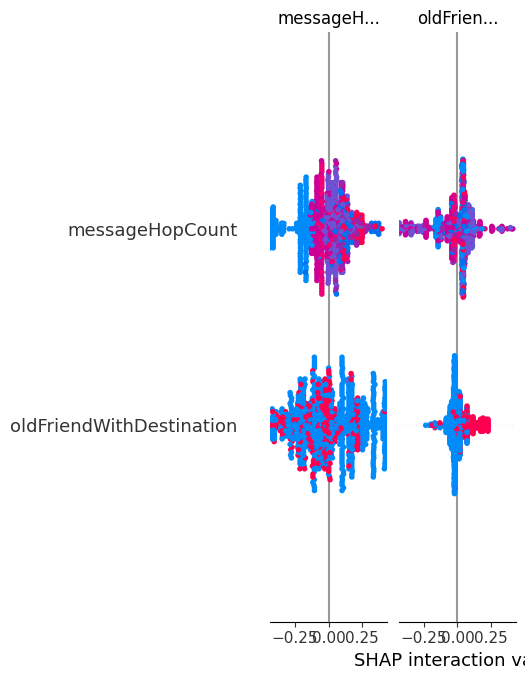

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

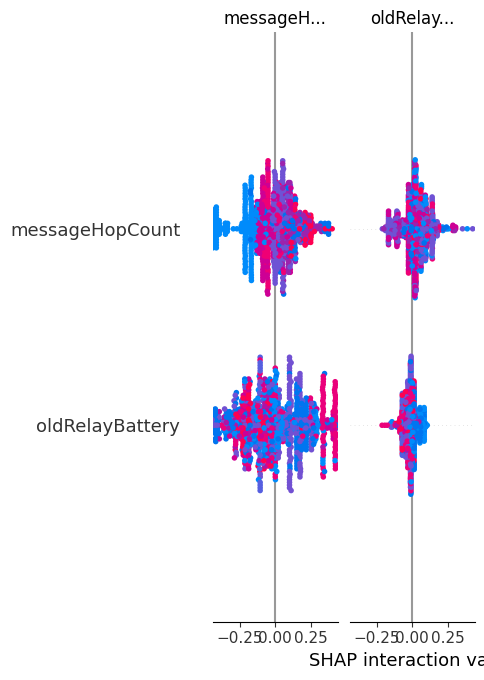

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

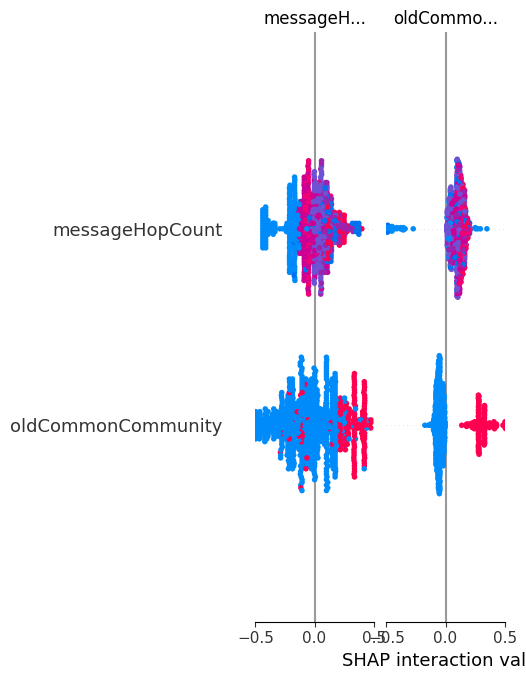

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

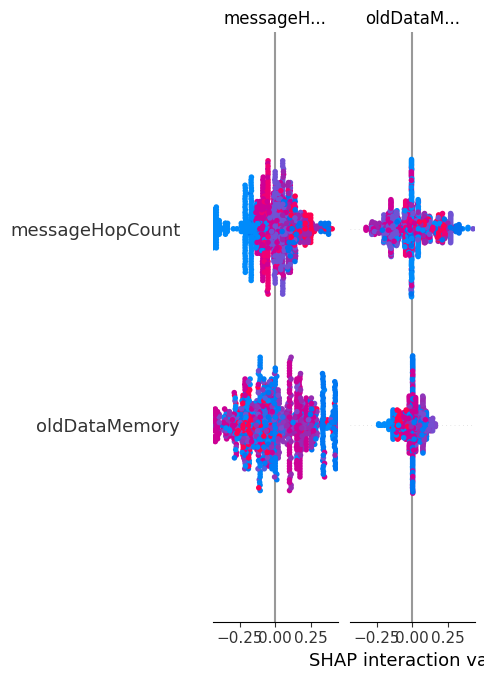

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

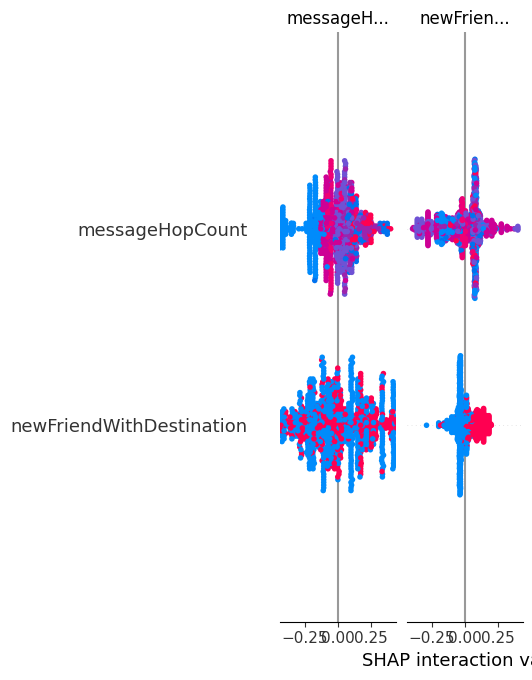

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

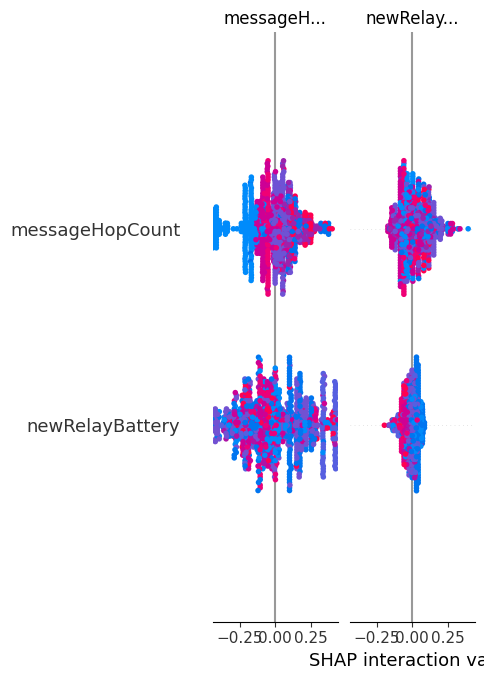

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

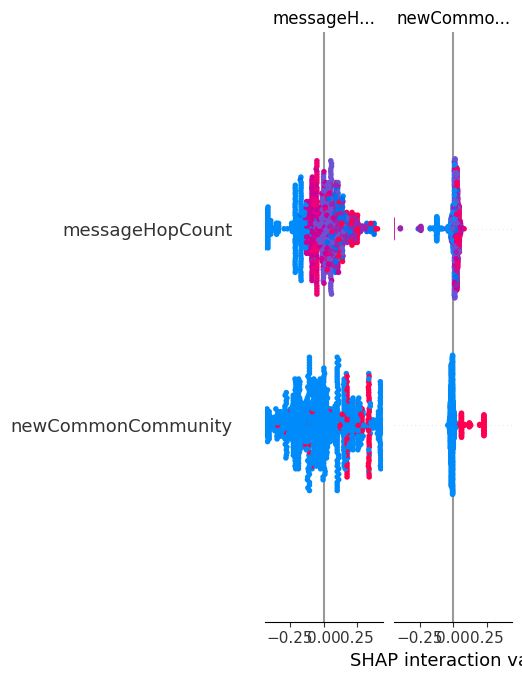

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

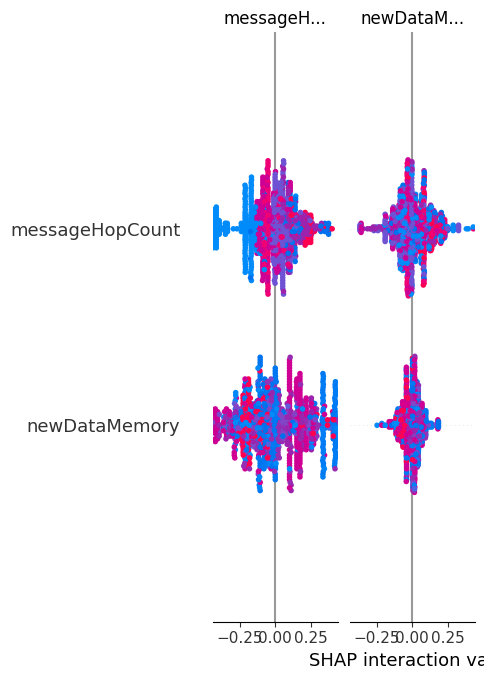

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

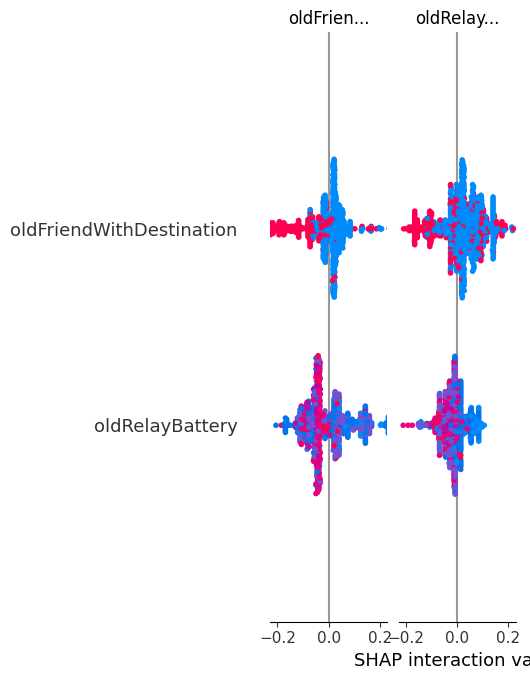

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

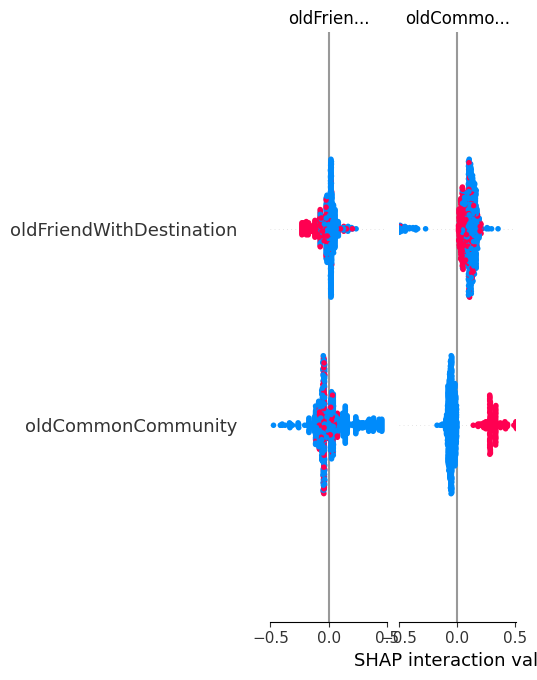

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

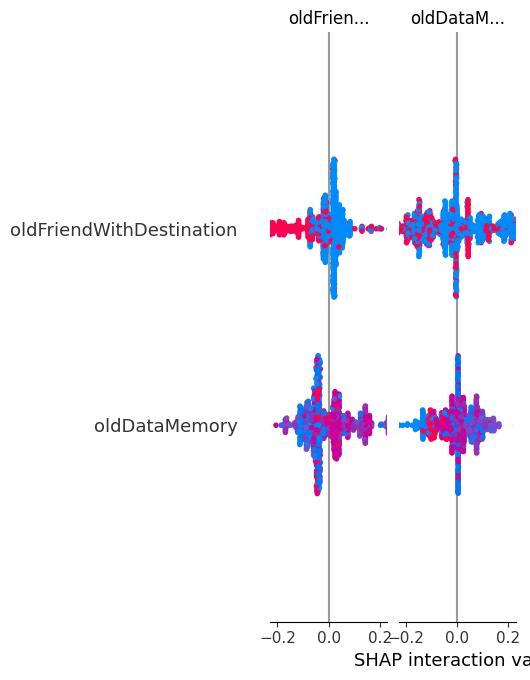

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

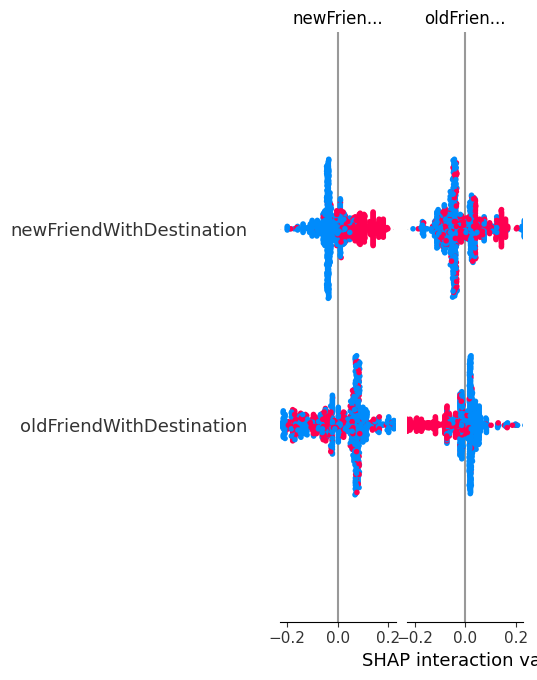

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

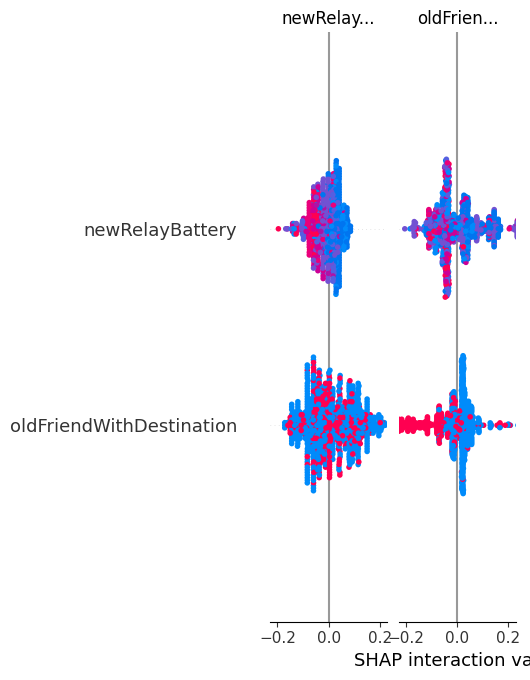

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

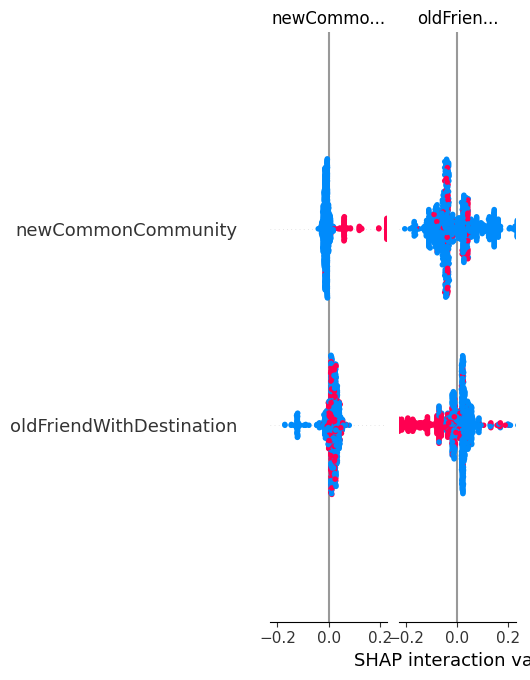

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

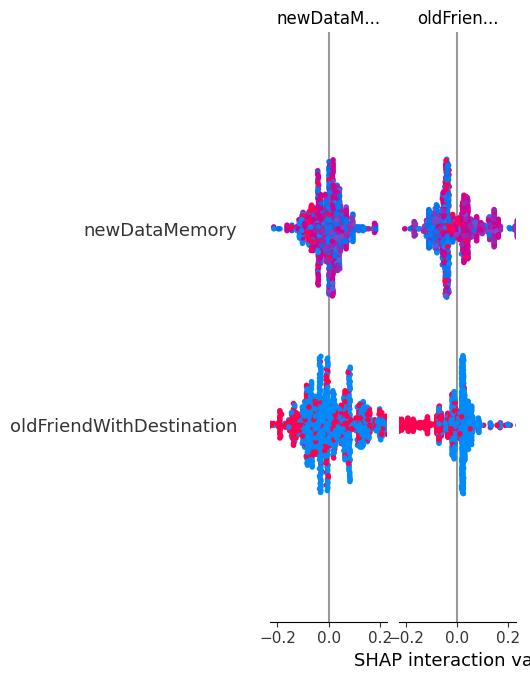

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

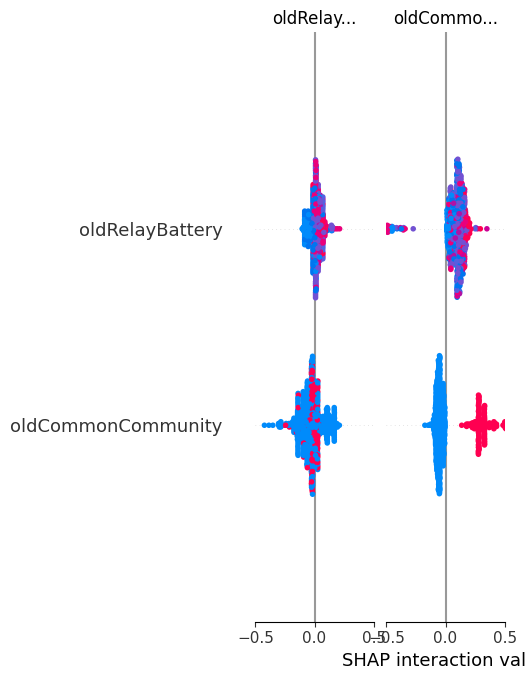

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

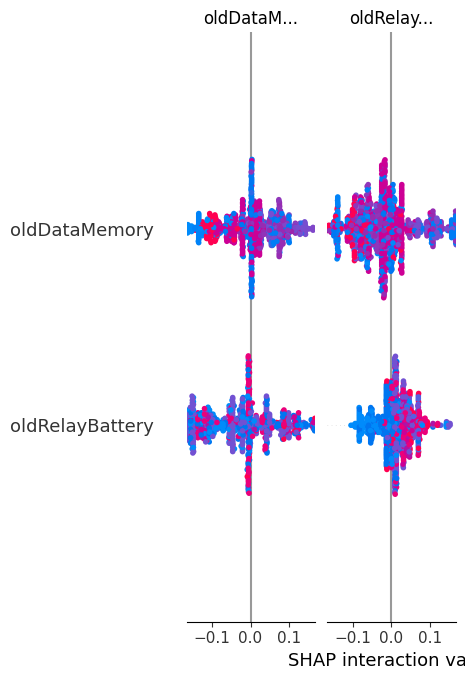

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

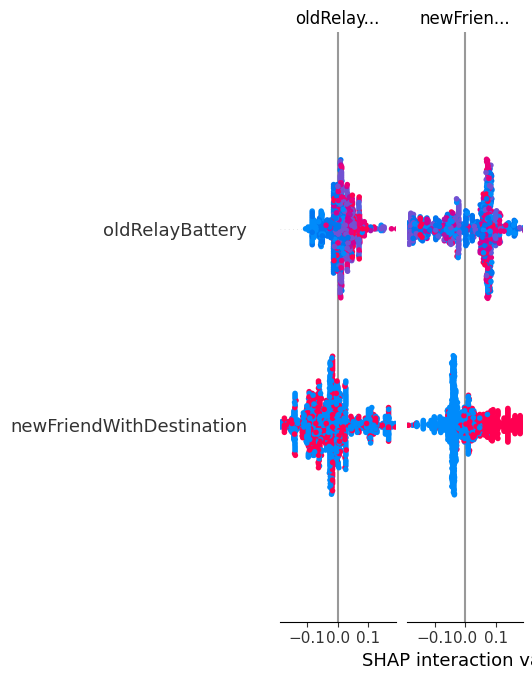

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

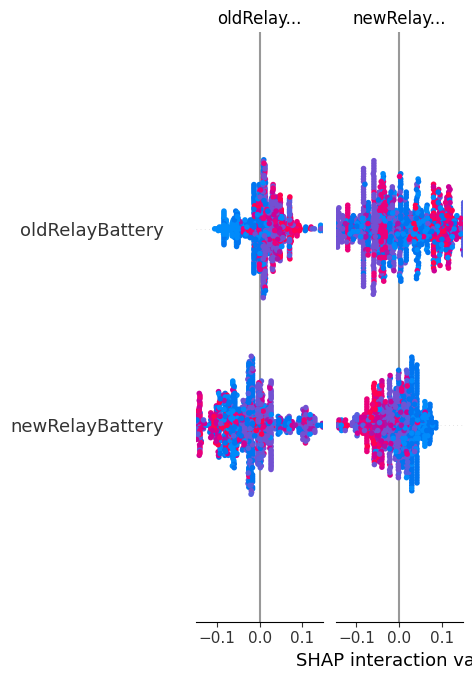

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

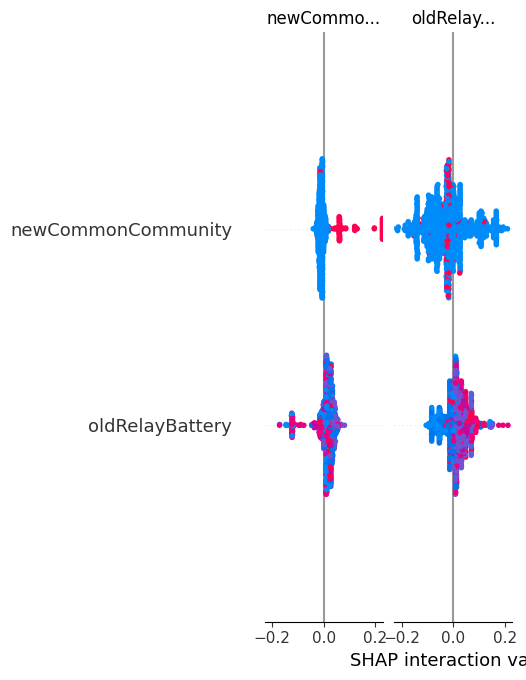

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

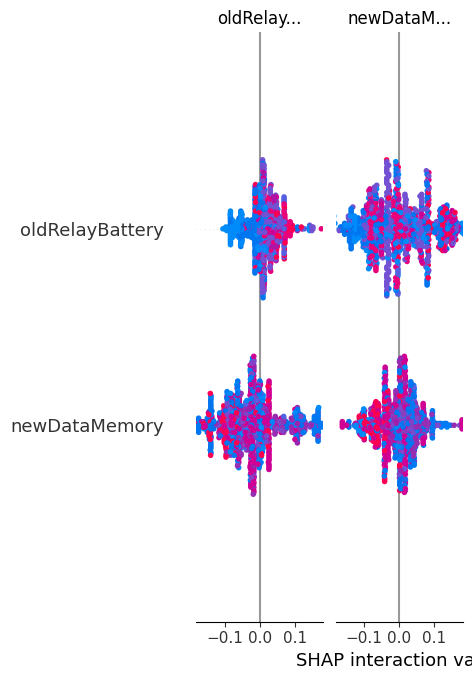

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

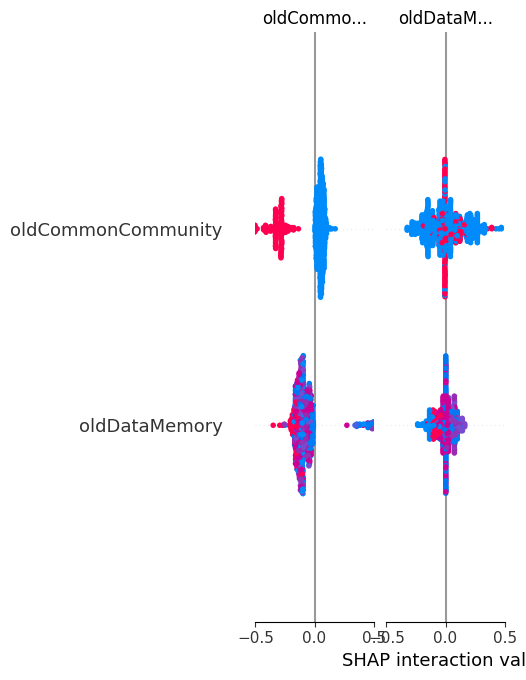

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

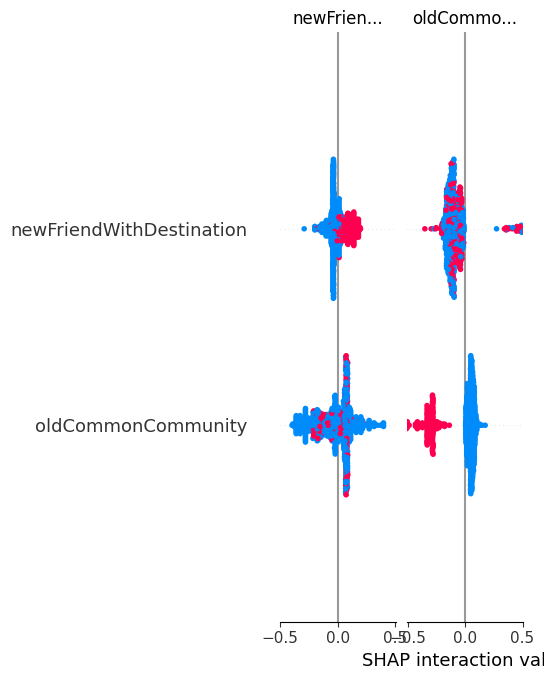

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

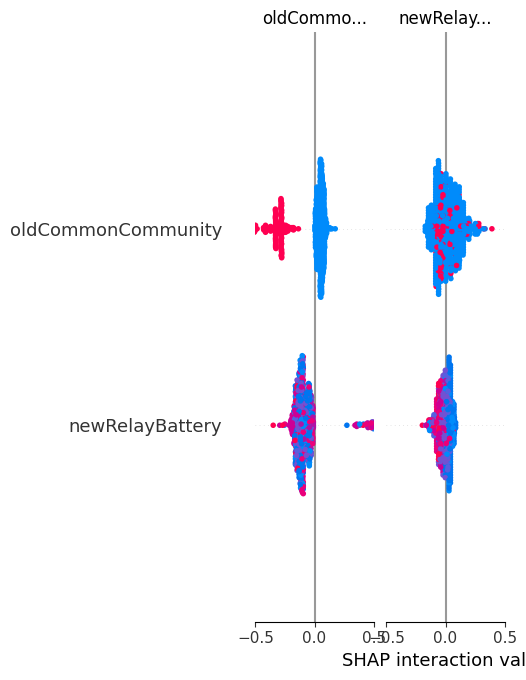

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

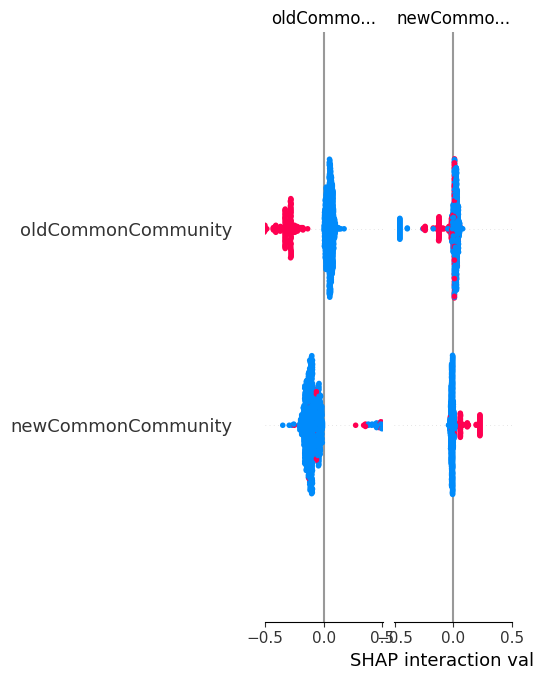

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

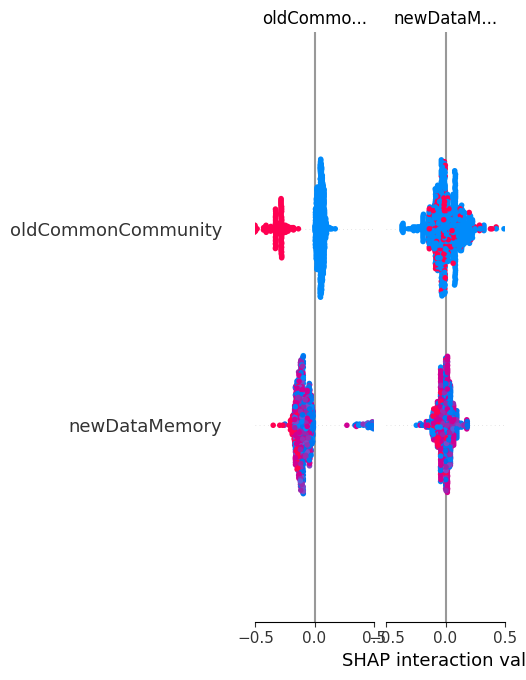

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

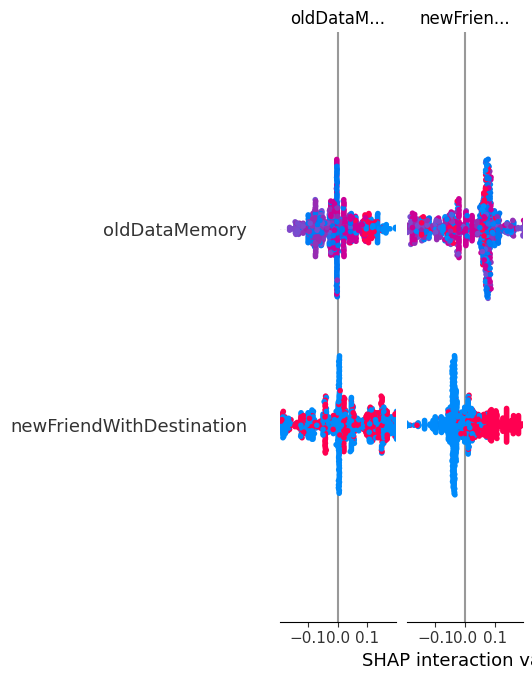

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

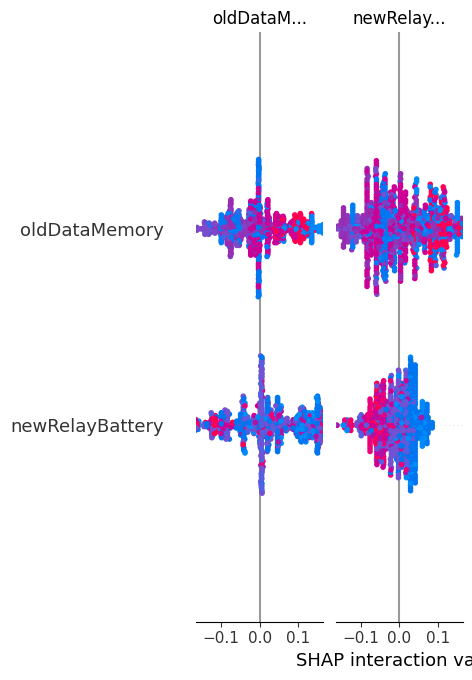

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

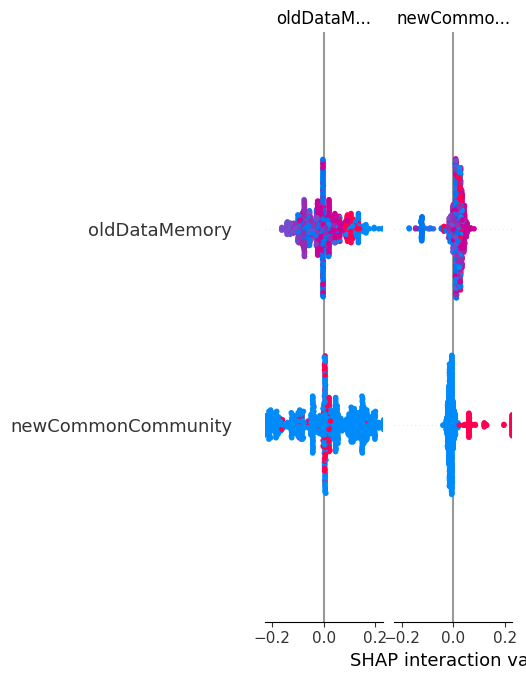

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

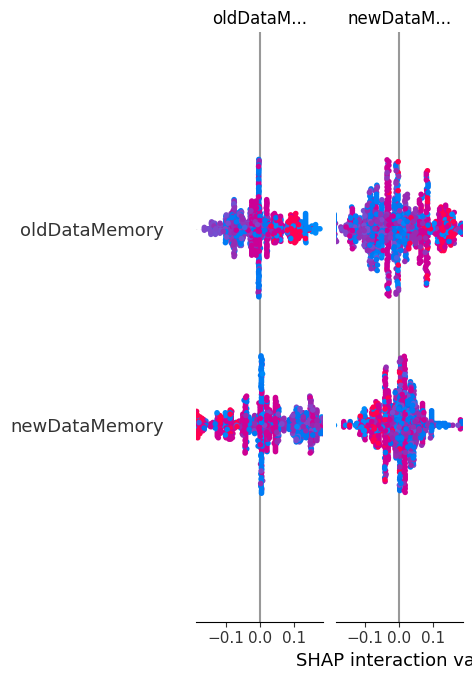

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

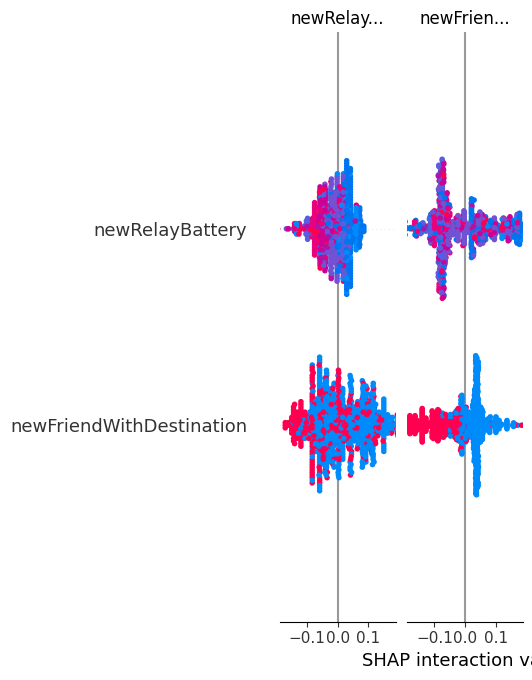

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

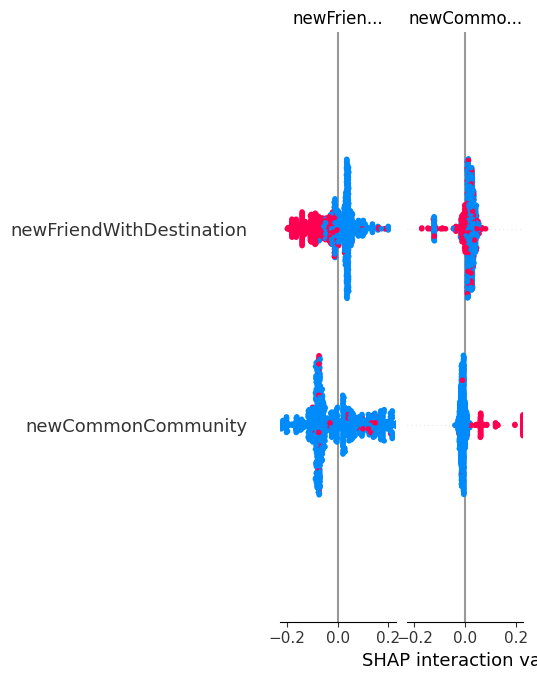

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

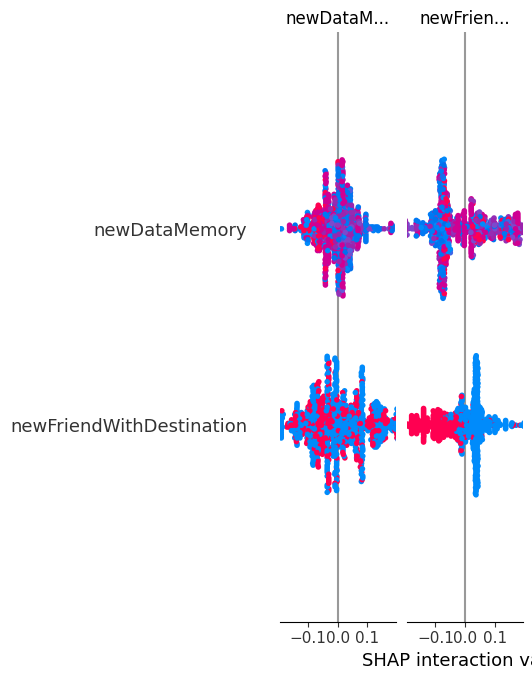

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

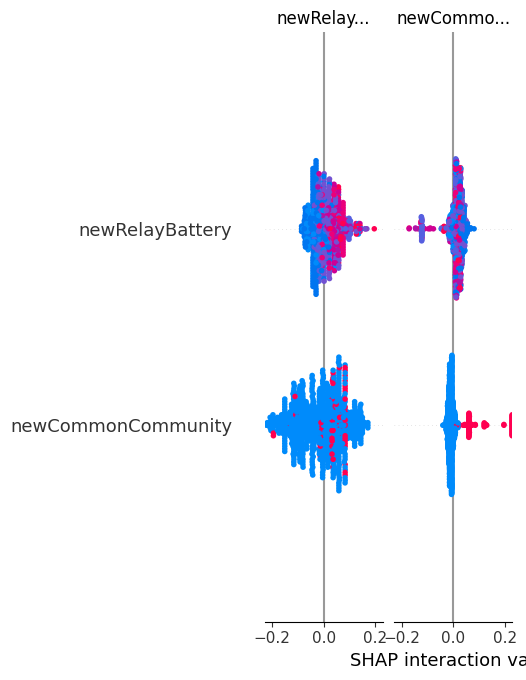

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

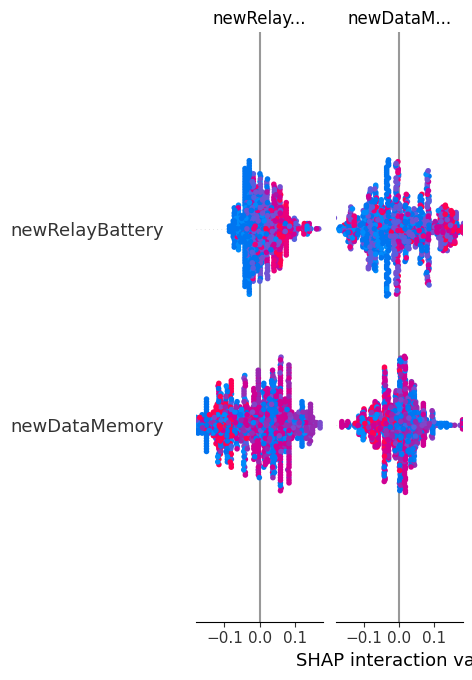

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

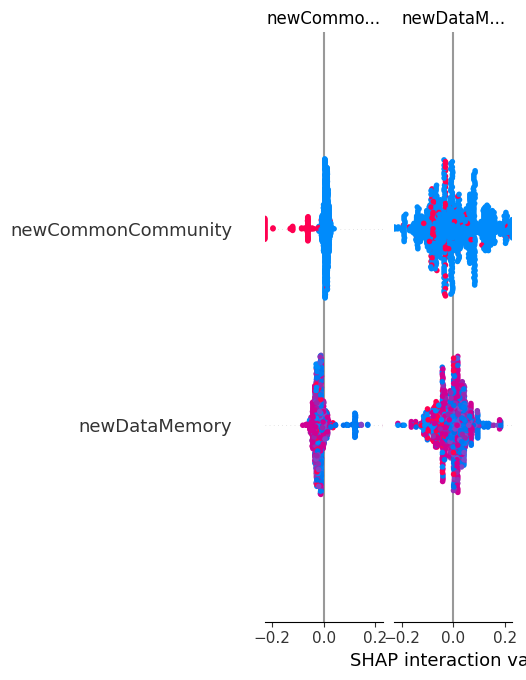

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [319]:

desired_features = list(balanced_df.columns[:-1])
for i in range(0, len(desired_features) - 1):
    for j in range(i+1, len(desired_features)):
        feature_indices = [i, j]
        shap_values_subset = shap_values[:, feature_indices]  
        shap_values_subset
        feat_subset = X_test[list(map(lambda f: desired_features[f], feature_indices))]
        plt.figure()
        shap.summary_plot(shap_values_subset, feat_subset, plot_type="bar")  
        display(plt.gcf()) 




100%|===================| 4124/4128 [03:22<00:00]        

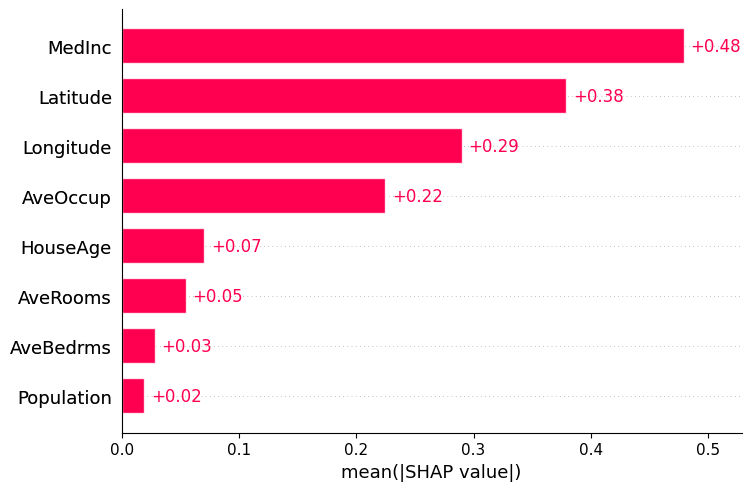

In [159]:
shap.plots.bar(explainer(X_test, check_additivity=False))